# Titanic - Binary Classification Problem

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
warnings.filterwarnings('ignore')

%matplotlib inline

In [65]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [66]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1.1 Null Data Check

In [69]:
for col in df_train.columns:
    msg = "column: {:>10}\t Percent of NaN Value: {:.2f}".format(
    col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN Value: 0.00
column:   Survived	 Percent of NaN Value: 0.00
column:     Pclass	 Percent of NaN Value: 0.00
column:       Name	 Percent of NaN Value: 0.00
column:        Sex	 Percent of NaN Value: 0.00
column:        Age	 Percent of NaN Value: 19.87
column:      SibSp	 Percent of NaN Value: 0.00
column:      Parch	 Percent of NaN Value: 0.00
column:     Ticket	 Percent of NaN Value: 0.00
column:       Fare	 Percent of NaN Value: 0.00
column:      Cabin	 Percent of NaN Value: 77.10
column:   Embarked	 Percent of NaN Value: 0.22


In [70]:
for col in df_test.columns:
    msg = "column: {:>10}\t Percent of NaN Value: {:.2f}".format(
    col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN Value: 0.00
column:     Pclass	 Percent of NaN Value: 0.00
column:       Name	 Percent of NaN Value: 0.00
column:        Sex	 Percent of NaN Value: 0.00
column:        Age	 Percent of NaN Value: 20.57
column:      SibSp	 Percent of NaN Value: 0.00
column:      Parch	 Percent of NaN Value: 0.00
column:     Ticket	 Percent of NaN Value: 0.00
column:       Fare	 Percent of NaN Value: 0.24
column:      Cabin	 Percent of NaN Value: 78.23
column:   Embarked	 Percent of NaN Value: 0.00


# 1.2 Target label

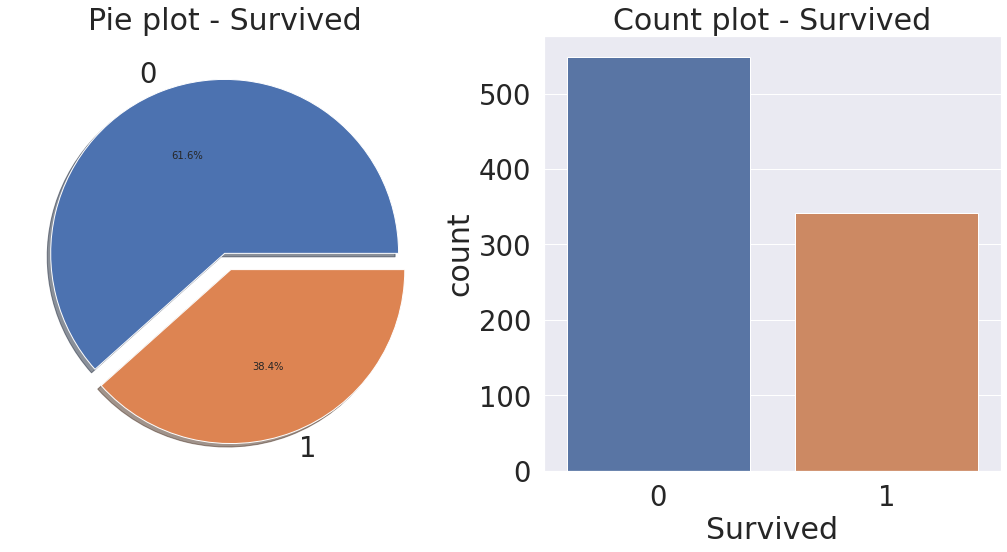

In [71]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1],
                                            autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot("Survived", data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. Exploratory Data Analysis

# 2.1 Pcalss

In [72]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"],as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [73]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [74]:
# pandas - crosstab
# margins = False(default)

pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [75]:
# margins = True

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

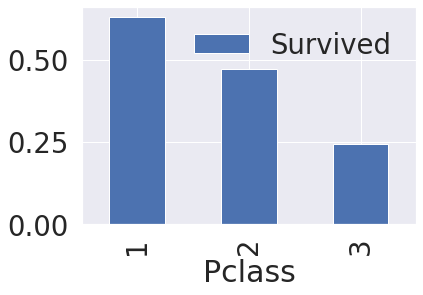

In [76]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar()

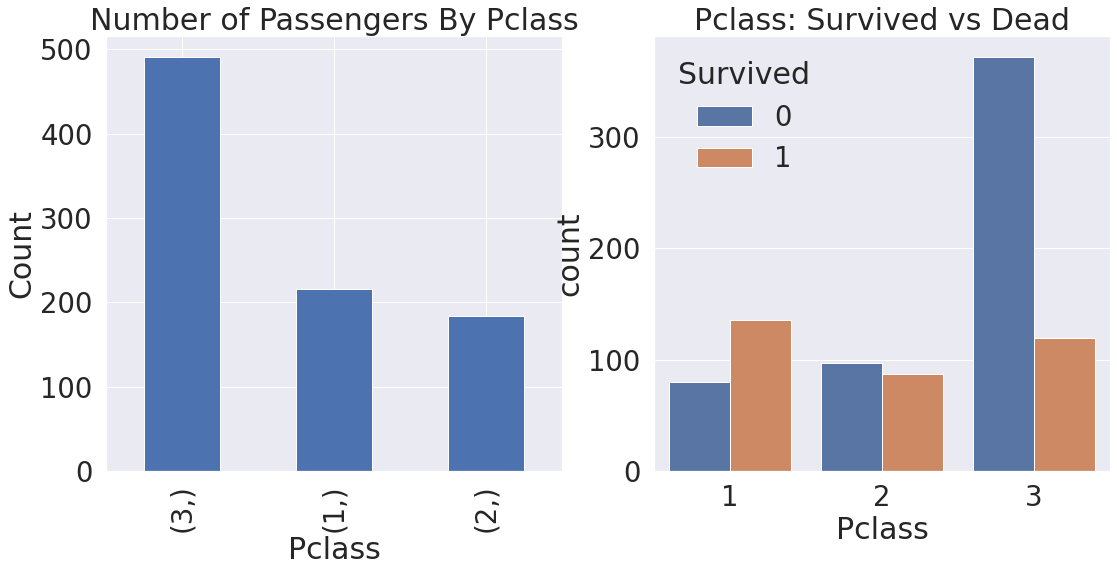

In [77]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Pclass']].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [78]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

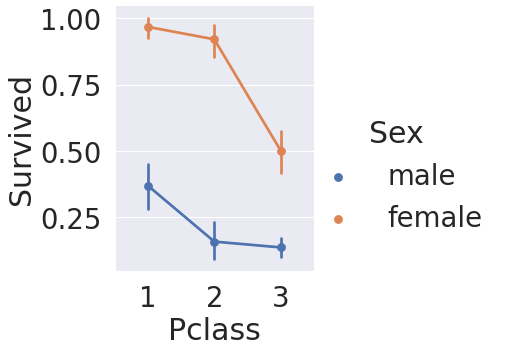

In [79]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train)

plt.show()

# 2.2 Age

In [80]:
print('Oldest Passenger was of: ', df_train['Age'].max(), 'Years')
print('Youngest Passenger was of: ', df_train['Age'].min(), 'Years')
print('Average Age on the ship: ', df_train['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


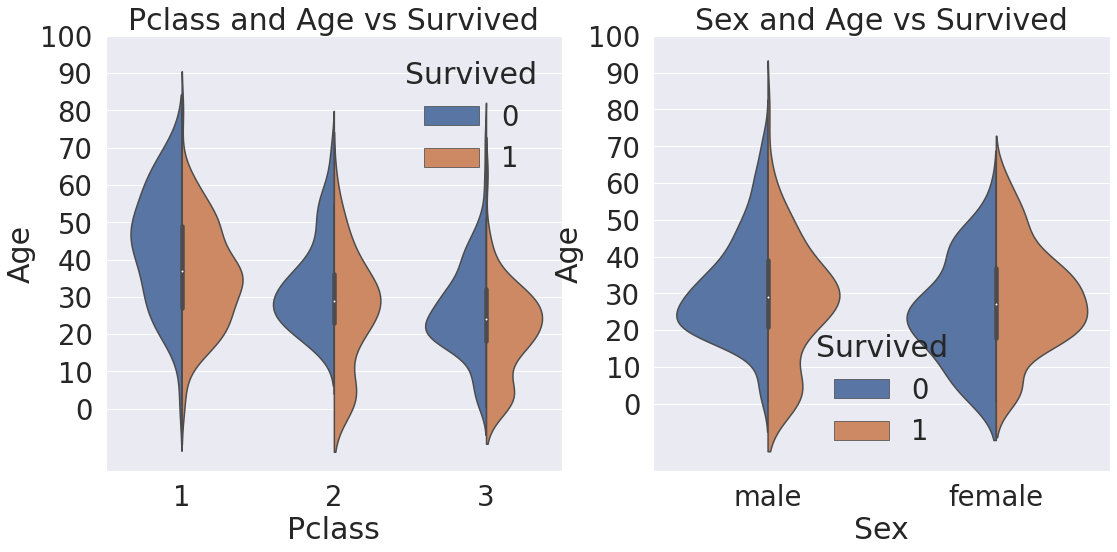

In [81]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = df_train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

# 2.3 Embarked

In [82]:
pd.crosstab([df_train.Embarked, df_train.Pclass], [df_train.Sex, df_train.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

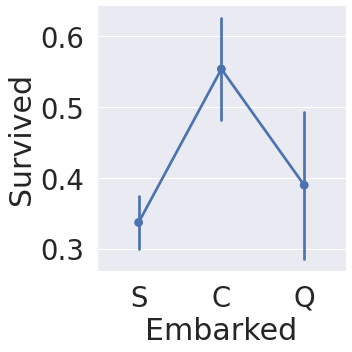

In [83]:
sns.factorplot('Embarked', 'Survived', data = df_train)
plt.show()

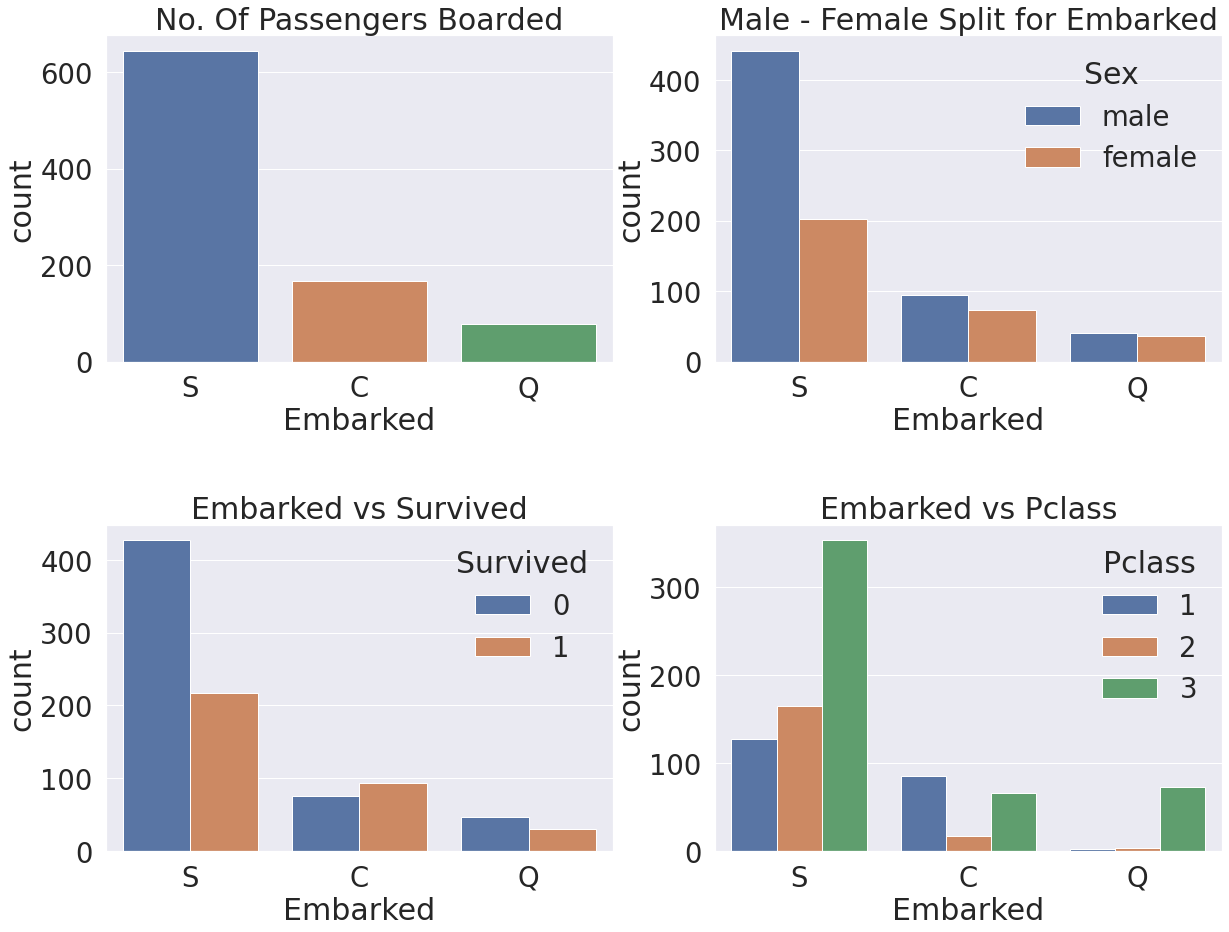

In [87]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('Male - Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

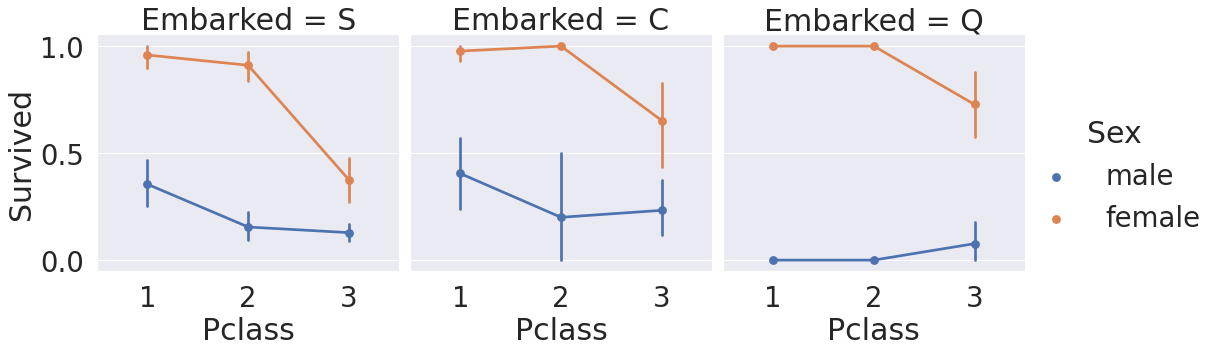

In [88]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = df_train)
plt.show()

In [90]:
df_train['Embarked'].fillna('S', inplace = True)

In [91]:
df_train.Embarked.isnull().sum()

0

# 2.4 SibSip

In [96]:
pd.crosstab([df_train.SibSp], df_train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


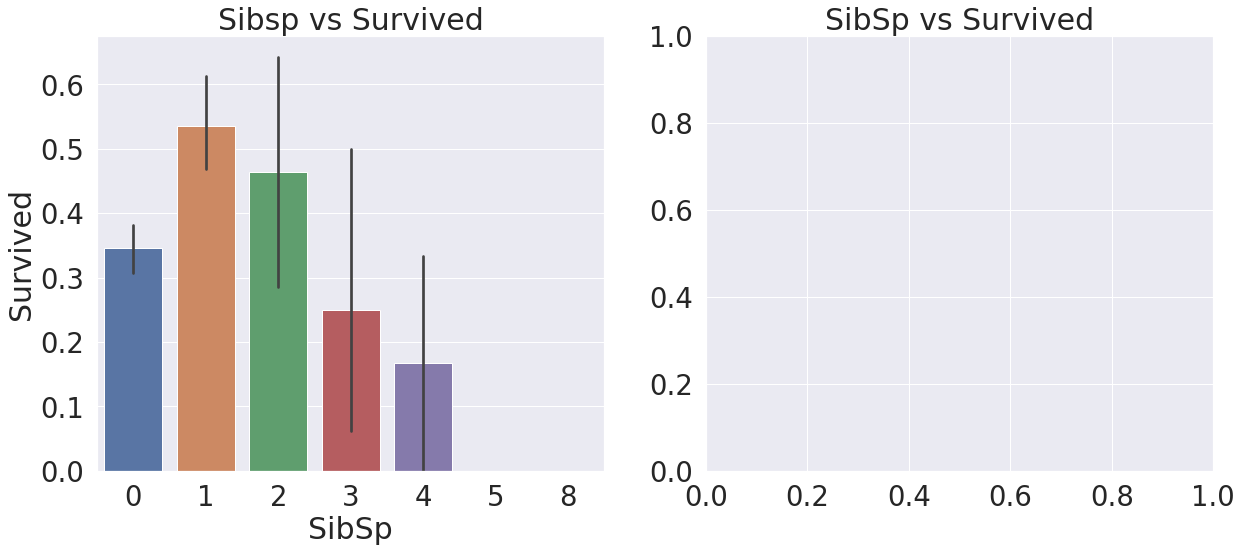

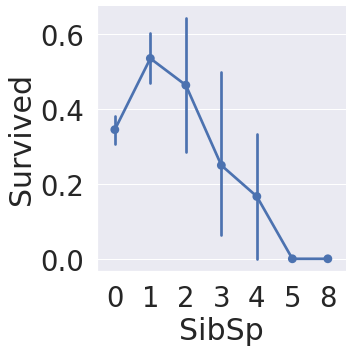

In [105]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title('Sibsp vs Survived')
sns.factorplot('SibSp', 'Survived', data = df_train, ax = ax[1])
# ax[1].xlim(0, 10)
ax[1].set_title('SibSp vs Survived')
plt.show()

In [107]:
pd.crosstab(df_train.SibSp, df_train.Pclass, margins = True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


# 2.5 Parch

In [108]:
pd.crosstab(df_train.Parch, df_train.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


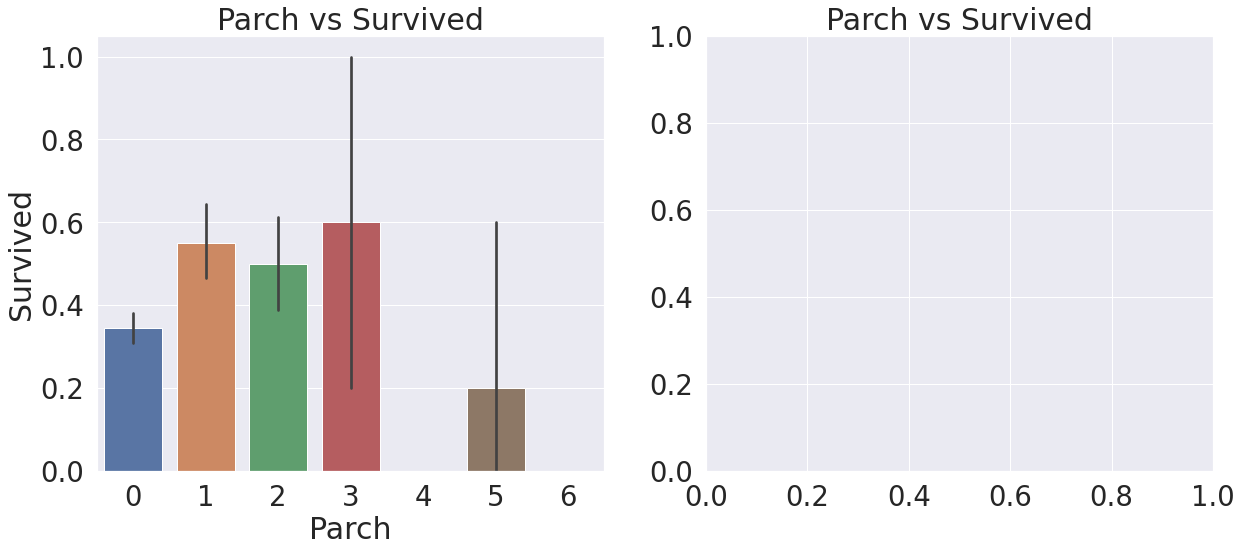

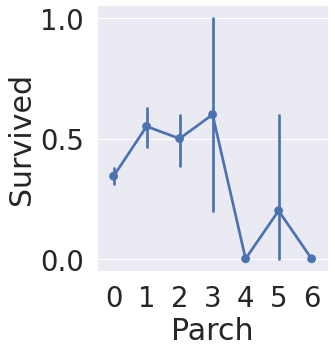

In [111]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = df_train, ax = ax[0])
ax[0].set_title("Parch vs Survived")
sns.factorplot('Parch', 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

# 2.6 Fare